# Introducción

La tienda online Ice vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Se debe identificar patrones que determinen si un juego tiene éxito o no. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias.

# Descripción de datos

Se trabajará con el dataframe `games.csv` proporcionado para este análisis. El archivo contiene las siguientes columnas:

- `Name` (Nombre)

- `Platform` (Plataforma)

- `Year_of_Release` (Año de lanzamiento)

- `Genre` (Género) 

- `NA_sales` (ventas en Norteamérica en millones de dólares estadounidenses) 

- `EU_sales` (ventas en Europa en millones de dólares estadounidenses) 

- `JP_sales` (ventas en Japón en millones de dólares estadounidenses) 

- `Other_sales` (ventas en otros países en millones de dólares estadounidenses) 

- `Critic_Score` (máximo de 100) 

- `User_Score` (máximo de 10) 

- `Rating` (ESRB)

Es posible que los datos de 2016 estén incompletos.

# Pauta de trabajo

Tomando en consideración la descripción de los datos, podemos darnos cuenta de la gran cantidad de posibilidades para realizar el análisis:

- Primero que todo se importará el dataset y se hará limpieza de los datos en la medida de lo posible.
- Se extraerán: la cantidad de juegos lanzados por año y el comportamiento en el mercado de las plataformas más rentables (como cuantos años tardan en llegar a su peak, cuantos años se mantienen y cuanto tardan en descender), esto para saber desde qué año en adelante tendremos información valiosa para detectar un futuro proyecto prometedor.
- En base a lo previamente recolectado, se analizará cuales plataformas son potencialmente rentables y se extraerá información acerca de ellas.
- Se comprobará si las opiniones de la crítica y de los usuarios afectan las ventas de juegos de una determinada plataforma.
- Se estudiará cuales son las diferencias entre los géneros con mas y con menos juegos vendidos.
- Se creará un perfil de usuario para las tres principales regiones (Norteamérica, la Unión Europea y Jopón) donde se conocerán los géneros, plataformas y clasificación ESRB de los juegos que se consumen.
- Finalmente se comprobarán estadísticamente dos hipótesis:  
    - Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas
    - Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

## Pre-análisis de los datos

Esta fase contempla todos los preparativos, importación de librerías, limpieza, etc. que se deben realizar antes de empezar con el análisis.

### Inicialización

Se procede a importar las librerías para el análisis, visualización y pruebas estadísticas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st 
import math as mt
import seaborn as sns

Se importan todas las librerias exitosamente.

In [2]:
plt.style.use('ggplot')

Se estilizan los graficos realizados con matplotlib

### Carga de datos

Ahora, se montará el dataset usando `read.csv`

In [3]:
games = pd.read_csv('/datasets/games.csv')

Una vez montado, se previsualiza el contenido.

In [4]:
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Se previsualizan los datos, encontrando valores ausentes y tipos de datos incorrectos en más de una columna.

### Preparar datos

Una vez cargado el dataset e identificados los problemas principales, se empiezan a limpiar los datos. Se empieza por la búsqueda de filas duplicadas.

In [5]:
games.duplicated().sum()

0

Se comprueba que en el dataframe no existen filas duplicadas que trabajar.

Se procede a transformar a minúsculas los títulos de las columnas para facilitar el trabajo posterior.

In [6]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


La transformación es exitosa.

Ahora se examinará la columna `user_score` ya que está en un formato erróneo.

In [7]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
1.3       2
1.1       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Se descubre que gran parte de los juegos ingresados aparecen con `tbd` en la columna `user_score`, que significa "to be determined", al ser una parte importante de los datos se conservarán estas filas y cuando toque el momento de analizar puntajes, se creará un dataset filtrado sin los `tbd`. Se procederá de igual forma con la columna `critic_score`.

Ahora vamos a las columnas `name` y las categóricas que presentan valores ausentes y se rellenan con `Unknown`.

In [8]:
games['name'].fillna('Unknown', inplace=True)
games['genre'].fillna('Unknown', inplace=True)
games ['rating'].fillna('Unknown',inplace=True)

La limpieza termina exitosamente.

### Enriquecer los datos

Se crea una columna de ventas totales sumando las ventas de las regiones importantes más la columna de `other_sales`.

In [9]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


## Análisis de los datos

Ya terminado el pre-procesamiento se puede empezar con el análisis, donde se tratará de abarcar todas las variables posibles para tener una campaña exitosa en 2017.

### Juegos lanzados por año

Para saber la cantidad de juegos lanzados por año se trazará un gráfico de linea, que mostrará a partir de qué año hay juegos suficientes para realizar un análisis completo.

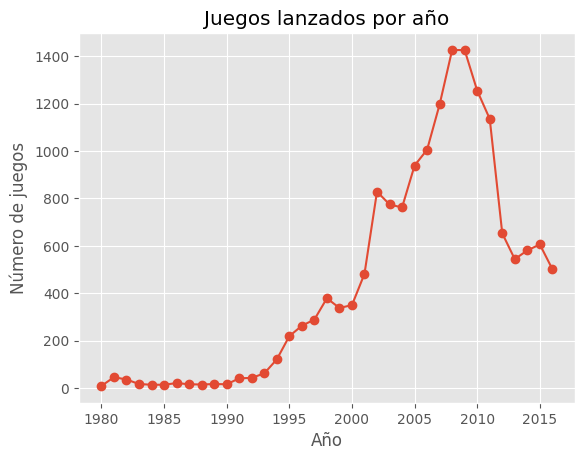

In [10]:
games['year_of_release'].value_counts().sort_index(ascending=False).plot(style='o-', grid='on', xlabel='Año', ylabel='Número de juegos', title='Juegos lanzados por año');

Se observa la cantidad de videojuegos lanzados por año, podemos apreciar que desde 1995 se superan los 200 juegos lanzados por año y que desde el 2001 se superan los 400, haciendo que los datos recopilados sean significativos para un análisis. Además podemos notar un periodo record en 2008 y 2009, en donde se lanzaron más de 1400 juegos a la venta.

### Análisis de plataformas

Un gráfico de barras será lo mejor para averiguar cuáles son las plataformas con más ventas en la historia de los videojuegos.

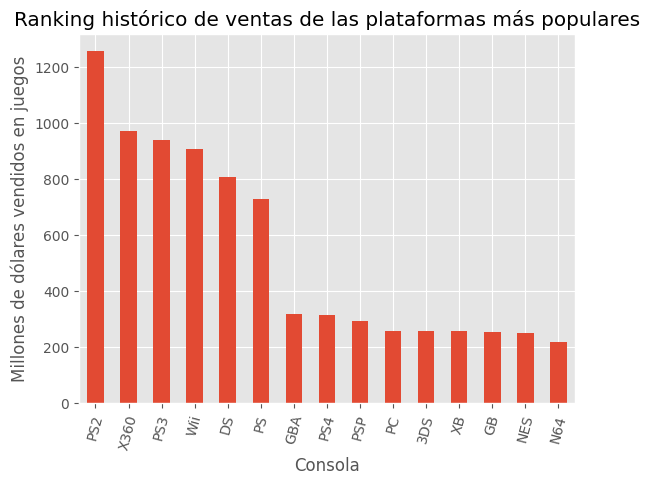

In [11]:
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(15).plot(kind='bar', grid='on',rot=75, xlabel='Consola', ylabel='Millones de dólares vendidos en juegos', title='Ranking histórico de ventas de las plataformas más populares');

A partir del gráfico anterior se seleccionaran las 5 primeras plataformas (por ser las más rentables en cuanto a venta de videojuegos) y se analizará por año el ingreso de cada una.

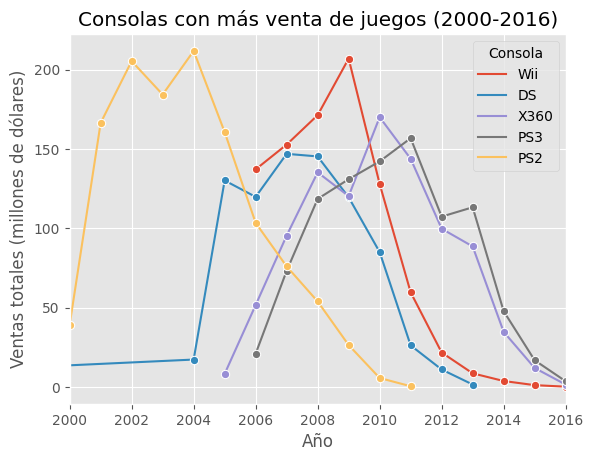

In [12]:
top_platform = games[(games['platform'] == 'PS2') | (games['platform'] == 'X360') | (games['platform'] == 'PS3') | (games['platform'] == 'Wii') | (games['platform'] == 'DS')]
sns.lineplot(y='total_sales', x='year_of_release', data=top_platform, hue='platform', estimator=sum, marker='o', ci=None).set_title('Consolas con más venta de juegos (2000-2016)')
plt.xlim(2000, 2016)
plt.ylabel('Ventas totales (millones de dólares)')
plt.xlabel('Año')
plt.legend(title='Consola');

Del presente gráfico se puede apreciar que las plataformas de PlayStation, Xbox y la Nintendo DS, __se demoran entre dos a tres años en tomar una posición sólida en el mercado, donde se mantienen por entre cuatro a cinco años__. La Nintendo Wii se muestra como una excepción, ya que muestra un peak muy alto en 2009 y después se desploma brúscamente.

Tomando en cuenta la información recolectada anteriormente, __se analizarán los juegos lanzados desde 2013 en adelante, de esta forma podremos saber qué plataformas están en camino a despegar, cuales no lo están haciendo, y cuales están bajando su popularidad__.

### Plataformas potencialmente rentables

Se crearán dos filtros para continuar con el análisis, el que filtra juegos desde 2013 en adelante y otro que filtra de 2010 en adelante, para tener un más contexto histórico de las ventas de las plataformas populares del último tiempo.

In [13]:
filtered_year = games[games['year_of_release'] > 2009]
games = games[games['year_of_release'] > 2012]
print(games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10))

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
Name: total_sales, dtype: float64


Aquí creamos la variable `filtered_year` para seguir los datos históricos de las plataformas seleccionadas en `games`. Como se puede apreciar, __se actualizó la variable `games` para que abarque sólo los datos de 2013 en adelante__, revelando la lista de las nuevas plataformas mas rentables, __apareciendo ahora la PS4 en primer lugar__.

Se analizarán los top en ventas de las plataformas por año, para detectar si hay una que haya aparecido bruscamente en el mercado y deba ser puesta en el siguiente gráfico.

In [14]:
t2014 = games[games['year_of_release'] == 2014]
print(t2014.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10))
print()
t2015 = games[games['year_of_release'] == 2015]
print(t2015.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10))
print()
t2016 = games[games['year_of_release'] == 2016]
print(t2016.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10))

platform
PS4     100.00
XOne     54.07
PS3      47.76
3DS      43.76
X360     34.74
WiiU     22.03
PC       13.28
PSV      11.90
Wii       3.75
PSP       0.24
Name: total_sales, dtype: float64

platform
PS4     118.90
XOne     60.14
3DS      27.78
PS3      16.82
WiiU     16.35
X360     11.96
PC        8.52
PSV       6.25
Wii       1.14
PSP       0.12
Name: total_sales, dtype: float64

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64


No se encuentran surgimientos repentinos.

Se seleccionan las plataformas con más ventas de los últimos años para ser comparadas su ventas de juegos en el tiempo, de esa forma se podrá saber cuales son potencialmente rentables y cuales van en descenso.

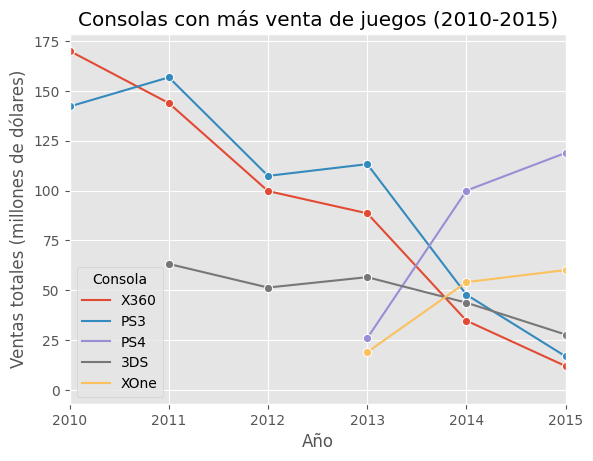

In [15]:
top_new_platform = filtered_year[(filtered_year['platform'] == 'PS4') | (filtered_year['platform'] == 'PS3') | (filtered_year['platform'] == 'XOne') | (filtered_year['platform'] == '3DS') | (filtered_year['platform'] == 'X360')]
sns.lineplot(y='total_sales', x='year_of_release', data=top_new_platform, hue='platform', estimator=sum, marker='o', ci=None).set_title('Consolas con más venta de juegos (2010-2015)')
plt.xlim(2010, 2015)
plt.ylabel('Ventas totales (millones de dólares)')
plt.xlabel('Año')
plt.legend(title='Consola');

El gráfico muestra que __las plataformas potencialmente rentables son PS4 y Xbox One__, que han ido subiendo en ventas desde 2013 y se espera que lo sigan haciendo hasta tomar una posición sólida en el mercado, la nintendo 3DS ha ido bajando paulatinamente sus ventas, sin embargo, en 2015 sigue siendo la tercera plataforma mas exitosa en ventas de juegos. 

__En el caso de PS3 y Xbox 360, podemos ver una caída rápida desde que aparecen las sucesoras (PS4 y Xbox One), lo que puede significar que serán plataformas muy exitosas hasta que sean reemplazadas por sus respectivas sucesoras__ en 2019/2020 aproximadamente, tomando en cuenta que entre el lanzamiento de PS2 y PS3 hay 6 años, y entre PS3 y PS4 hay 7 años de diferencia. En el caso de Xbox, entre la 360 y la One también hay 7 años de diferencia.

### Ventas de todos los juegos

Mediante estadística descriptiva y visualizaciones, se analizará cuanto generan en ventas los juegos y las diferencias por plataforma.

__Debido a que se actualiza la variable `games` todos los gráficos y conclusiones que se muestren a partir de este punto, contemplan exclusivamente información de 2013 en adelante.__

Se calculará qué porcentaje de juegos supera el millón de dólares en ventas y la distribución por cuartiles en las ventas de juegos.

In [16]:
more_1m = games[games['total_sales'] > 1]['name'].count()
total= games['name'].count()
print('El porcentaje de juegos que supera el millón de dólares en ventas es de :',(round(more_1m/total, 2)*100),'%')
print()
more_5m = games[games['total_sales'] > 5]['name'].count()
total= games['name'].count()
print('El porcentaje de juegos que supera los cinco millones de dólares en ventas es de :',(round(more_5m/total, 2)*100),'%')
print()
print(games['total_sales'].describe())

El porcentaje de juegos que supera el millón de dólares en ventas es de : 12.0 %

El porcentaje de juegos que supera los cinco millones de dólares en ventas es de : 1.0 %

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total_sales, dtype: float64


En cuanto a las ventas totales, __se observa una media muy superior a la mediana y una distribución que nos indica que la proporción de valores atípicos es muy baja, sin embargo estos soy muy altos__. Los calulos indical que de todos los juegos lanzados a la venta entre 2013 y 2016 __un 12% superó el millon de dólares en ventas y apenas un 1% superó los 5 millones__.

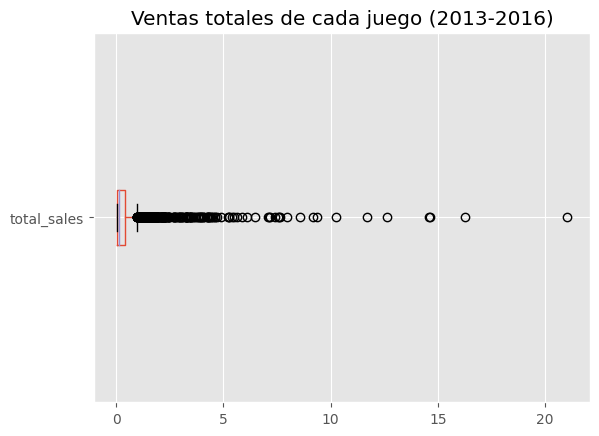

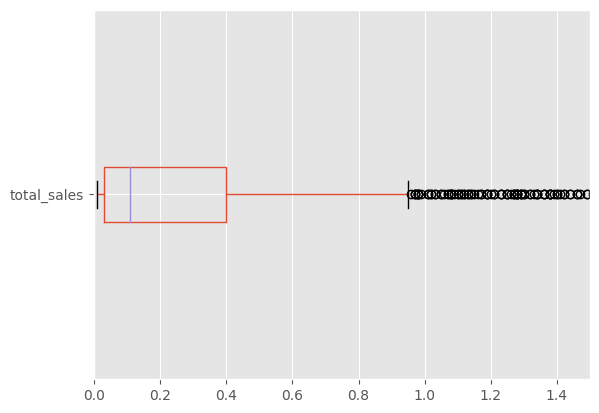

In [17]:
games['total_sales'].plot(kind='box', vert=False, grid='on', title='Ventas totales de cada juego (2013-2016)')
plt.show()
games['total_sales'].plot(kind='box', vert=False, grid='on', xlim=[0,1.5]);

El gráfico de caja confirma e ilustra lo concluído anteriormente.

Para continuar con el análisis de la distribución de ventas, se presentan gráficos de dispersión y de caja por plataforma para las consolas más populares.

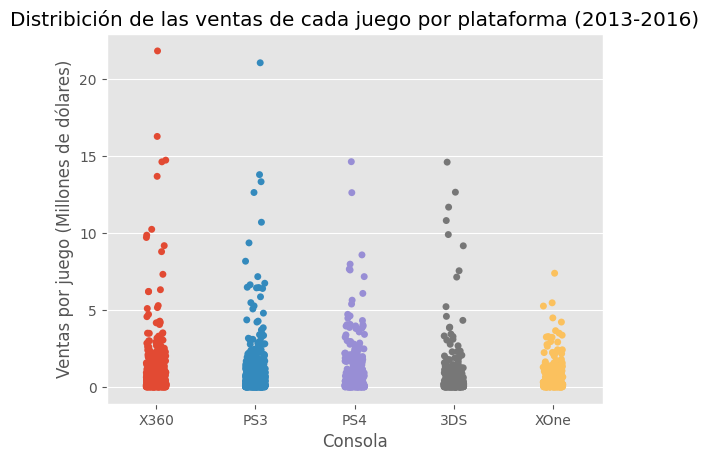

In [18]:
sns.stripplot(x='platform', y='total_sales', data=top_new_platform).set_title('Distribición de las ventas de cada juego por plataforma (2013-2016)')
plt.xlabel('Consola')
plt.ylabel('Ventas por juego (Millones de dólares)');

Este gráfico está enfocado en los valores atípicos, muestra que la X360 y la PS3 tienen más _best sellers_ que el resto, mientras que de la nueva ola de plataformas, __destacan la 3DS y la PS4__. Ahora se procederá con el gráfico de caja.

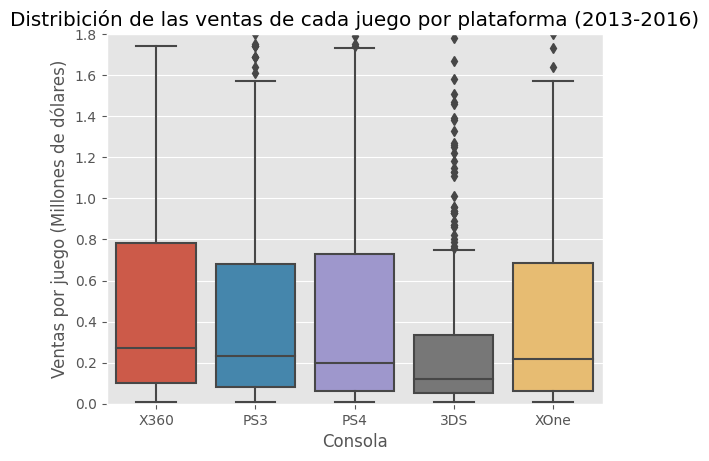

In [19]:
sns.boxplot(x='platform', y='total_sales', data=top_new_platform).set_title('Distribición de las ventas de cada juego por plataforma (2013-2016)')
plt.ylim(0,1.8)
plt.xlabel('Consola')
plt.ylabel('Ventas por juego (Millones de dólares)');

Este gráfico muestra que las medianas en ventas son parejas, salvo por la 3DS que se queda atrás en la distribución.

In [20]:
print('Un juego en X360 genera en promedio' ,games[games['platform'] == 'X360']['total_sales'].mean().round(2), 'Millones de dólares')
print('Un juego en PS3 genera en promedio' ,games[games['platform'] == 'PS3']['total_sales'].mean().round(2), 'Millones de dólares')
print('Un juego en PS4 genera en promedio' ,games[games['platform'] == 'PS4']['total_sales'].mean().round(2), 'Millones de dólares')
print('Un juego en 3DS genera en promedio' ,games[games['platform'] == '3DS']['total_sales'].mean().round(2), 'Millones de dólares')
print('Un juego en X360 genera en promedio' ,games[games['platform'] == 'XOne']['total_sales'].mean().round(2), 'Millones de dólares')

Un juego en X360 genera en promedio 0.74 Millones de dólares
Un juego en PS3 genera en promedio 0.53 Millones de dólares
Un juego en PS4 genera en promedio 0.8 Millones de dólares
Un juego en 3DS genera en promedio 0.47 Millones de dólares
Un juego en X360 genera en promedio 0.65 Millones de dólares


En cuanto a las medias, __la PS4 es la clara ganadora, debido a su distribución estable y buena cantidad de _best sellers_ es que se posiciona como la plataforma con más potencial para 2017__, seguida por la Xbox One.

### Correlación entre calificaciones y ventas: PS4

Se analizará la correlación entre calificaciones tanto de usuario como la crítica, y la venta de juegos en ps4

#### Correlación entre calificaciones de usuario y ventas

Se procederá un un gráfico de dispersión y se calculará en coeficiente de correlación.


El coeficiente de correlación es: -0.031957110204556424


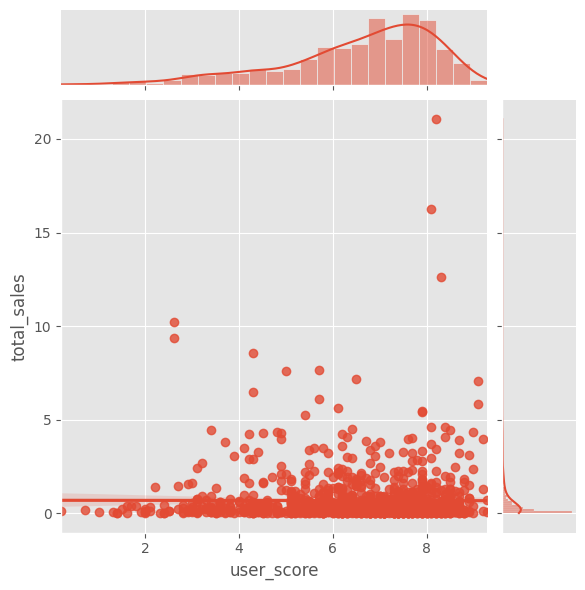

In [21]:
users_score = games[(~games['user_score'].isna())]
users_score = users_score[(users_score['user_score'] != 'tbd')]
users_score['user_score'] = users_score['user_score'].astype('float64')
users_ps4 = users_score[users_score['platform'] == 'PS4']
sns.jointplot(x='user_score', y='total_sales', data=users_score, kind='reg')
print()
print('El coeficiente de correlación es:', users_ps4['user_score'].corr(users_ps4['total_sales']))

En base al gráfico de arriba se puede concluir que no hay correlación directa entre las críticas de los usuarios y las ventas de juegos de PS4.

#### Correlación entre calificaciones de la crítica y ventas

Se procederá un un gráfico de dispersión y se calculará en coeficiente de correlación.


El coeficiente de correlacion es: 0.40656790206178095


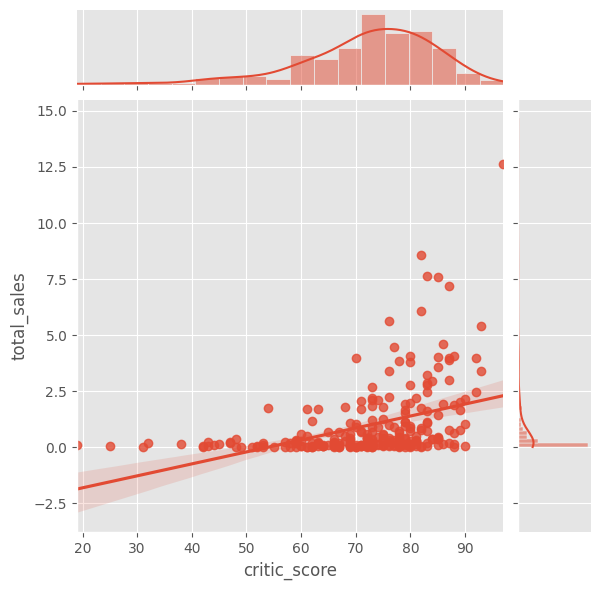

In [22]:
critic_ps4 = games[(games['platform'] == 'PS4')]
sns.jointplot(x='critic_score', y='total_sales', data=critic_ps4, kind='reg')
print()
print('El coeficiente de correlacion es:', critic_ps4['critic_score'].corr(critic_ps4['total_sales']))

Tomando en cuenta el gráfico, se puede concluir que __existe un 40% de correlación entre las calificaciones de los críticos y las ventas de juegos. Esto se aprecia sobre todo en los juegos más exitosos, que solo tienen calificaciones por sobre los 75 puntos__. Esto quiere decir que una calificación alta de la crítica no garantiza un rotundo éxito del juego, pero, una calificación baja si garantiza que el juego no será un "best seller".

### Comparación en venta de juegos populares: PlayStation versus Xbox

Debido a que han sido las principales marcas en el mercado de las consolas, se hará una comparación de ventas de _best sellers_ entre PlayStation y Xbox.

#### PS3 vs. Xbox 360

Se seleccionan los cinco juegos más vendidos que tengan versión en estas dos plataformas.

In [23]:
games.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(15).reset_index()

,name,total_sales
0,Grand Theft Auto V,56.58
1,Call of Duty: Ghosts,27.39
2,Call of Duty: Black Ops 3,25.67
3,Minecraft,24.16
4,Call of Duty: Advanced Warfare,21.97
5,FIFA 15,17.37
6,FIFA 14,16.46
7,FIFA 16,16.30
8,Pokemon X/Pokemon Y,14.60
9,Battlefield 4,13.94


Se procede a crear un gráfico de barras comparativo.

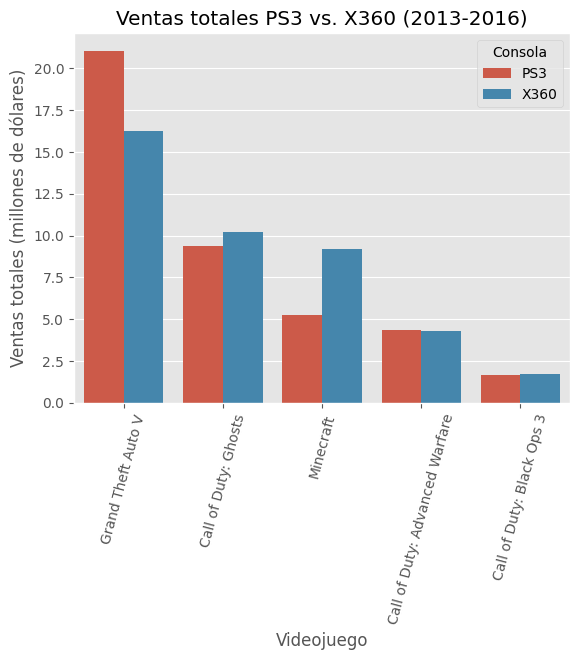

In [24]:
filtered_games = games[(games['name'] == 'Grand Theft Auto V') | (games['name'] == 'Call of Duty: Ghosts') | (games['name'] == 'Call of Duty: Black Ops 3') | (games['name'] == 'Minecraft') | (games['name'] == 'Call of Duty: Advanced Warfare')]
filtered_games = filtered_games[(filtered_games['platform'] == 'PS3') | (filtered_games['platform'] == 'X360')]

sns.barplot(x='name', y='total_sales', estimator=sum, data=filtered_games, hue='platform').set_title('Ventas totales PS3 vs. X360 (2013-2016)')
plt.xticks(rotation=75)
plt.ylabel('Ventas totales (millones de dólares)')
plt.xlabel('Videojuego')
plt.legend(title='Consola');

Como se puede apreciar, __ambas plataformas están muy parejas salvo en G.T.A. 5 y en Minecraft__, donde se inclina la preferencia de los usuarios hacia una de las dos consolas. Cabe destacar que la única instancia en que Xbox supera claramente a Playstation es en ventas de Minecraft, un juego de categoría `Misc`, esto puede indicar que dependiendo el genero del juego, los usuarios usarán una consola u otra.

#### PS4 vs. Xbox One

De la lista construída anteriormente se seleccionan los 5 juegos más populares que tengan versión para estas dos plataformas y se procede a construir un gráfico de barras comparativo.

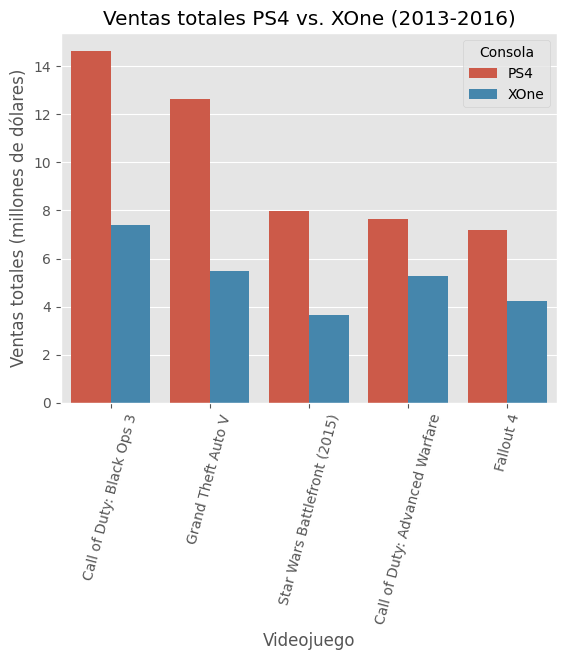

In [25]:
comp = games[(games['platform'] == 'PS4') | (games['platform'] == 'XOne')]
comp = comp.sort_values('total_sales', ascending=False).head(30)
comp = comp[(comp['name'] == 'Grand Theft Auto V') | (comp['name'] == 'Fallout 4') | (comp['name'] == 'Call of Duty: Black Ops 3') | (comp['name'] == 'Star Wars Battlefront (2015)') | (comp['name'] == 'Call of Duty: Advanced Warfare')]

sns.barplot(x='name', y='total_sales', estimator=sum, data=comp, hue='platform').set_title('Ventas totales PS4 vs. XOne (2013-2016)')
plt.xticks(rotation=75)
plt.ylabel('Ventas totales (millones de dólares)')
plt.xlabel('Videojuego')
plt.legend(title='Consola');

En este gráfico __se aprecia claramente la superioridad en ventas de juegos de la PS4 por sobre su rival__, aunque se debe tener claro que los juegos del top son casi todos de la categoría `Shooter` a excepción de G.T.A. 5 que es de Acción, sin embargo son categorías similares.

### Distribución general de los juegos por género

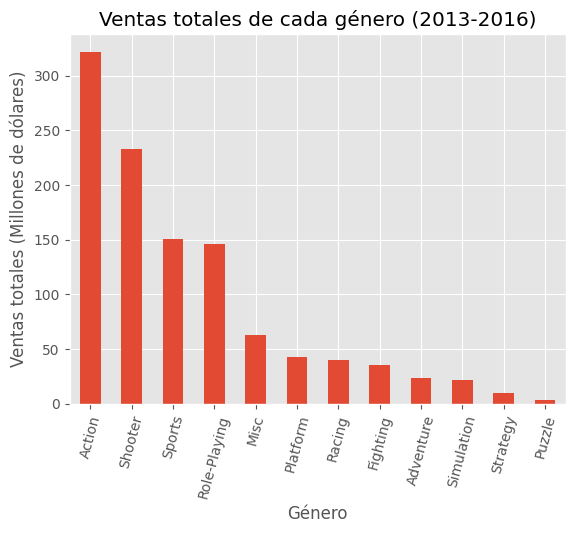

In [26]:
games.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', rot=75, ylabel='Ventas totales (Millones de dólares)', xlabel='Género', title='Ventas totales de cada género (2013-2016)', grid='on');

En base al gráfico de arriba __se clasificarán las plataformas como populares e impopulares, siendo seleccionadas las cuatro primeras y las cuatro últimas en ventas, respectivamente__. Se categorizarán mediante una función.

In [27]:
def categorization(row):
    
    genre = row['genre']
    
    if genre == 'Action' or genre == 'Sports' or genre == 'Shooter' or genre == 'Role-Playing':
        return 'popular_genre'
    elif genre == 'Puzzle' or genre == 'Simulation' or genre == 'Strategy' or genre == 'Adventure':
        return 'unpopular_genre'
    else:
        return 'moderately_popular'

games['popularity'] = games.apply(categorization, axis=1)
users_score['popularity'] = users_score.apply(categorization, axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,popularity
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,popular_genre
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,popular_genre
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63,popular_genre
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60,popular_genre
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,popular_genre


Mediante la aplicación de la función `categorization` se crea la columna `popularity` donde `popular_genre` y `unpopular_genre` determinan la si el género es de los mas o menos populares.

#### Géneros populares

Se graficarán las plataformas mas rentables para los géneros populares.

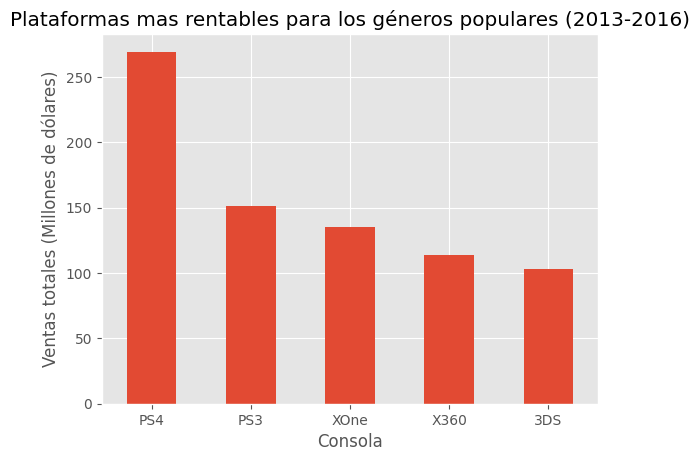

In [28]:
games[games['popularity'] == 'popular_genre'].groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', grid='on', title='Plataformas mas rentables para los géneros populares (2013-2016)', rot=0, xlabel='Consola', ylabel='Ventas totales (Millones de dólares)');

__La PS4 es notoriamente la plataforma mas rentable para los géneros populares__.

#### Géneros impopulares

Se graficarán las plataformas mas rentables para los géneros impopulares.

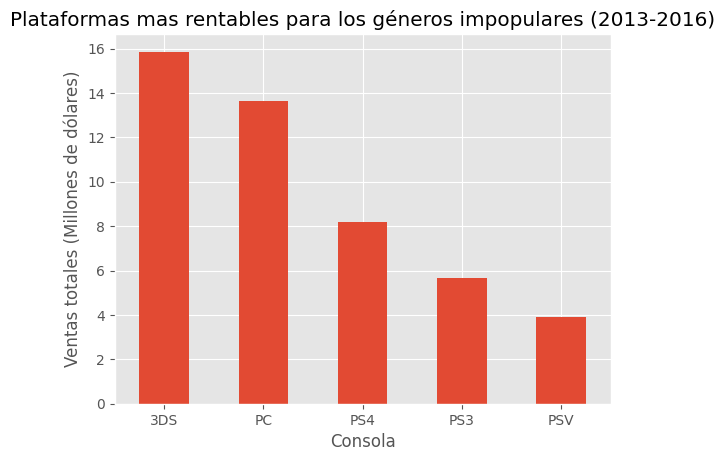

In [29]:
games[games['popularity'] == 'unpopular_genre'].groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', grid='on', title='Plataformas mas rentables para los géneros impopulares (2013-2016)', rot=0, xlabel='Consola', ylabel='Ventas totales (Millones de dólares)');

Los jugadores de generos impopulares prefieren __la 3DS y el PC__, sobre las demás opciones.

#### Diferencias en la calificación según popularidad

Se trazarán gráficos de caja para comparar las distribuciones de las calificaciones por popularidad, se empieza con las calificaciones de la crítica.

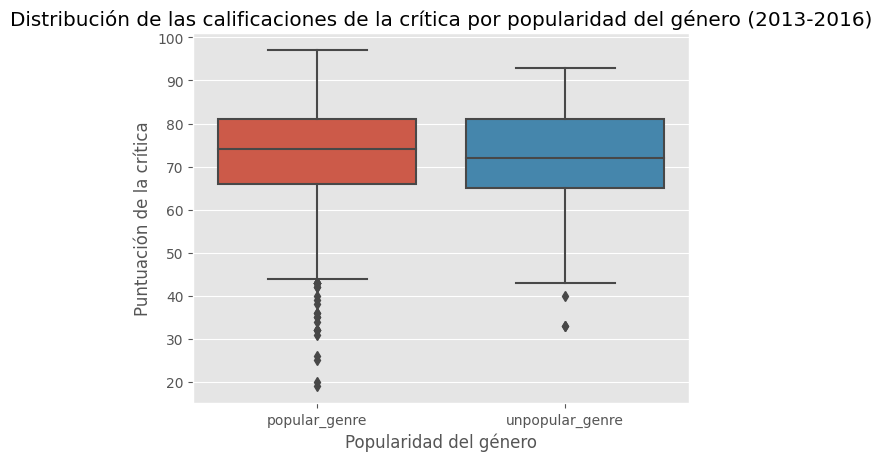

In [30]:
boxplot = games[games['popularity'] != 'moderately_popular']
sns.boxplot(y='critic_score', x='popularity', data=boxplot).set_title('Distribución de las calificaciones de la crítica por popularidad del género (2013-2016)')
plt.ylabel('Puntuación de la crítica')
plt.xlabel('Popularidad del género');

No hay muchas diferencias en cuanto a la distribución de las calificaciones de la crítica.

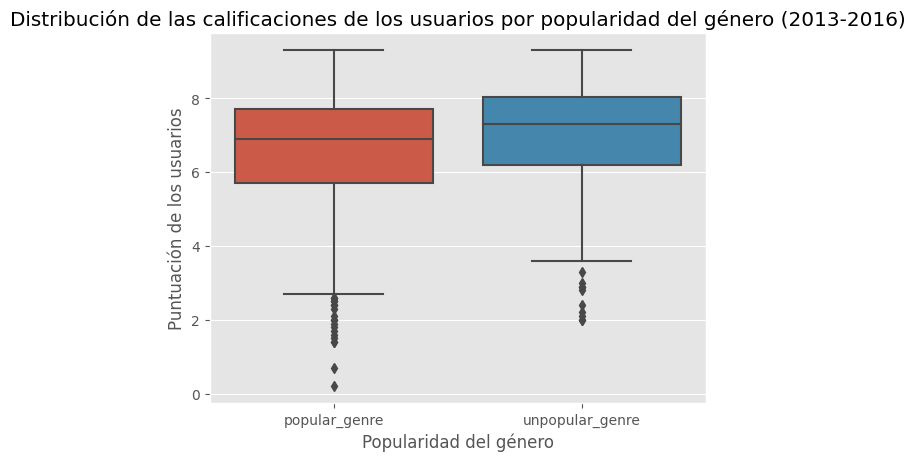

In [31]:
boxplot2 = users_score[users_score['popularity'] != 'moderately_popular']
sns.boxplot(y='user_score', x='popularity', data=boxplot2).set_title('Distribución de las calificaciones de los usuarios por popularidad del género (2013-2016)')
plt.ylabel('Puntuación de los usuarios')
plt.xlabel('Popularidad del género');

El gráfico muestra que, sorprendentemente, __las calificaciones de usuario para generos impopulares superan a las de los géneros populares__, esto puede deberse a que los jugadores de géneros no tan masivos son un nicho pequeño, pero muy fiel a los juegos/sagas.

## Perfil de usuario para región 

Para obtener un perfil de usuario para cada región, se recopilará información sobre los géneros más jugados, las plataformas preferidas (y sus variaciones en las cuotas de mercado con las otras regiones) y las clasificaciones ESRB de los 50 juegos más jugados.

### Norteamérica

Mediante diversas gráficas se obtendrá el perfil de usuario para la región de norteamérica, empezando con los plataformas favoritas.

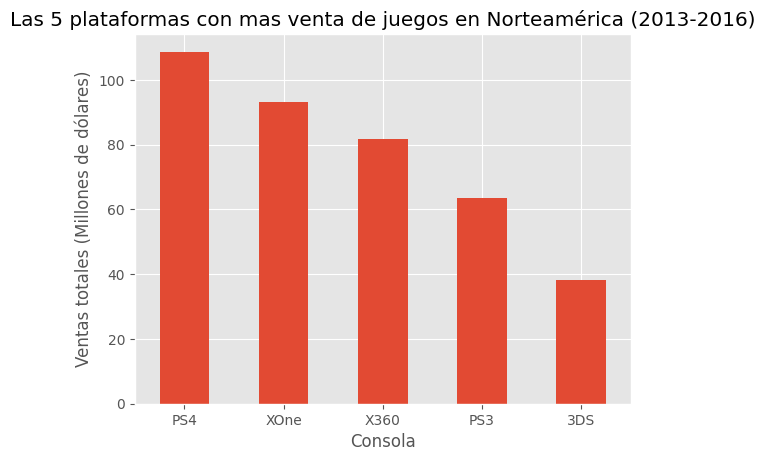

In [32]:
games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', rot=0, grid='on', title='Las 5 plataformas con mas venta de juegos en Norteamérica (2013-2016)', xlabel='Consola', ylabel='Ventas totales (Millones de dólares)');

 __La consola preferida en Norteamérica es la PlayStation 4, seguida de las Xbox__.
 
 Ahora se comparará la popularidad de estas plataformas en las otras regiones.

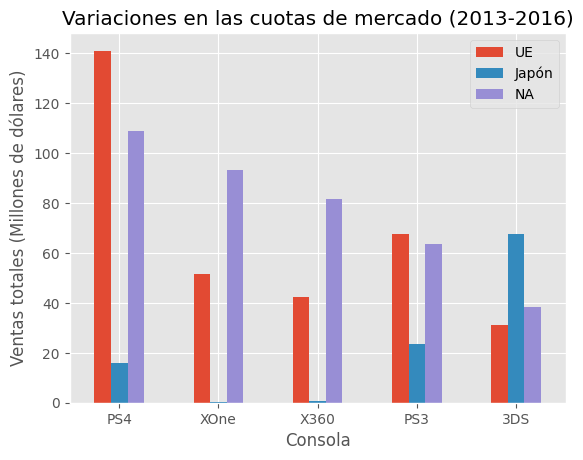

In [33]:
na_comp = games.pivot_table(index=['platform'], values=['na_sales','eu_sales','jp_sales'], aggfunc=['sum'])
na_comp = na_comp.loc[['PS4','XOne','X360','PS3','3DS']]
na_comp.plot(kind='bar', grid='on', rot=0, xlabel='Consola', ylabel='Ventas totales (Millones de dólares)', title='Variaciones en las cuotas de mercado (2013-2016)')
plt.legend(['UE','Japón','NA']);

__Norteamérica es la región donde las Xbox tienen mayor presencia__, probablemente debido a que es un producto estadounidense. __En japón casi no se compran juegos de Xbox__.

Ahora se visualizarán los géneros más populares de la región.

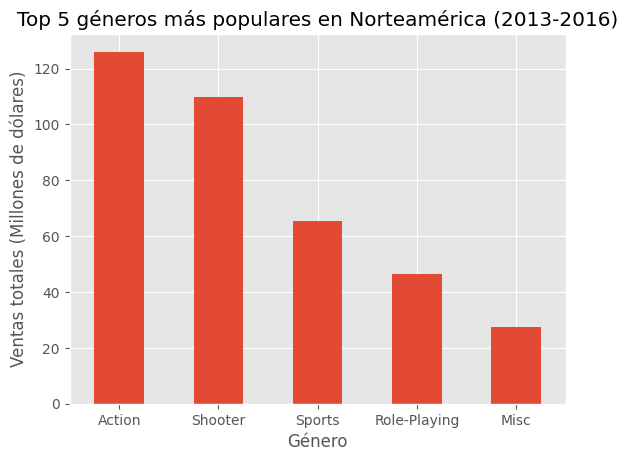

In [34]:
games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', rot=0, xlabel='Género', ylabel='Ventas totales (Millones de dólares)', title='Top 5 géneros más populares en Norteamérica (2013-2016)', grid='on');

En cuanto a géneros preferidos, __los consumidores de Norteamérica prefieren notoriamente los juegos de acción y los shooter__.

Finalmente se analizarán las preferencias en cuanto a calificación ESRB.

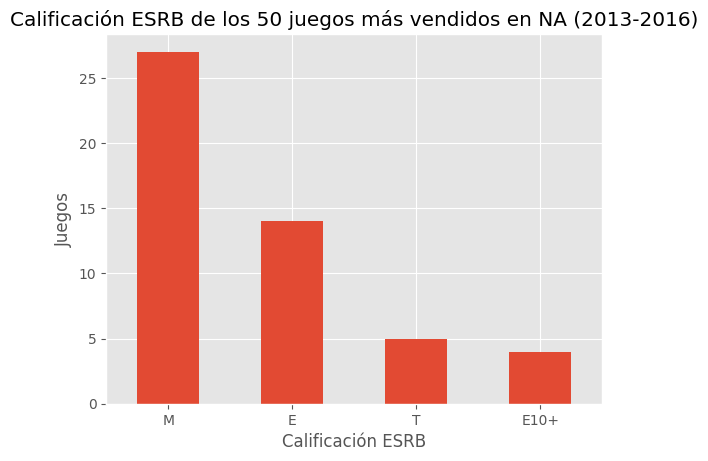

In [35]:
na_rank = games.sort_values('na_sales', ascending=False)
na_rank = na_rank[na_rank['rating'] != 'Unknown']
na_rank = na_rank.head(50)
na_rank.groupby('rating')['name'].count().sort_values(ascending=False).plot(kind='bar', rot=0, xlabel='Calificación ESRB', ylabel='Juegos', title='Calificación ESRB de los 50 juegos más vendidos en NA (2013-2016)');

Una gran mayoría prefiere juegos para mayores de 17 años.

### Unión europea

Mediante diversas gráficas se obtendrá el perfil de usuario para la región de la unión europea, empezando con los plataformas favoritas.

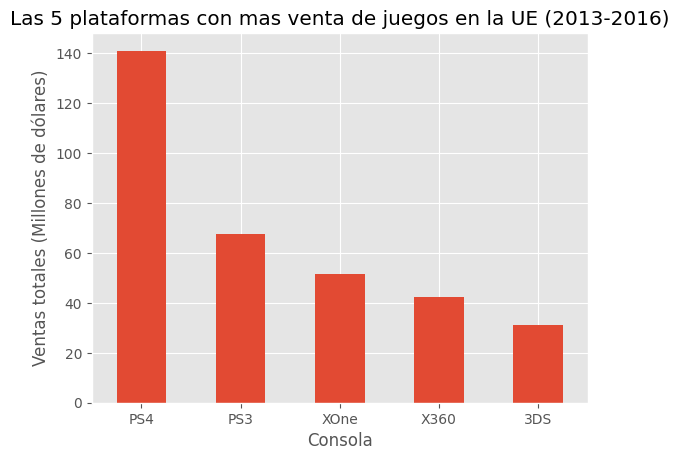

In [36]:
games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', rot=0, grid='on', title='Las 5 plataformas con mas venta de juegos en la UE (2013-2016)', xlabel='Consola', ylabel='Ventas totales (Millones de dólares)');

Con marcada diferencia, __la plataforma mas popular es la PS4, se aprecia que en la UE prefieren las PlayStation antes que las Xbox__.

 Ahora se comparará la popularidad de estas plataformas en las otras regiones.

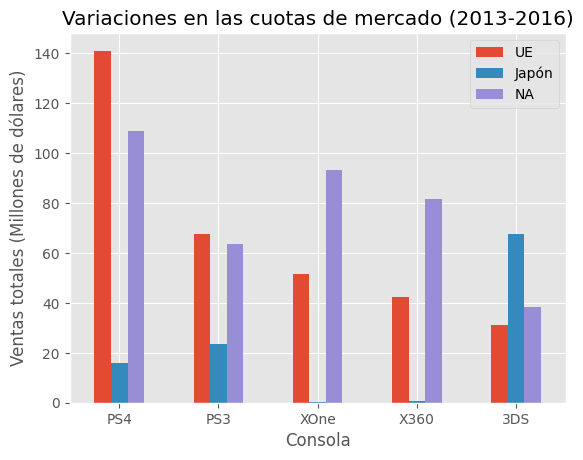

In [37]:
eu_comp = games.pivot_table(index=['platform'], values=['na_sales','eu_sales','jp_sales'], aggfunc=['sum'])
eu_comp = na_comp.loc[['PS4','PS3','XOne','X360','3DS']]
eu_comp.plot(kind='bar', grid='on', rot=0, xlabel='Consola', ylabel='Ventas totales (Millones de dólares)', title='Variaciones en las cuotas de mercado (2013-2016)')
plt.legend(['UE','Japón','NA']);

La UE es la región donde más se compran juegos de PS4.

Ahora se visualizarán los géneros más populares de la región.

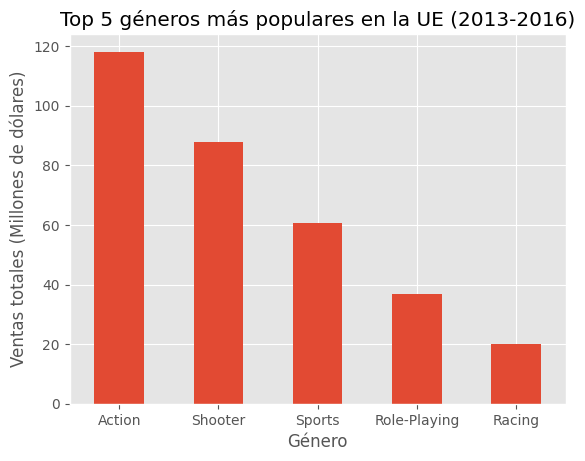

In [38]:
games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', rot=0, xlabel='Género', ylabel='Ventas totales (Millones de dólares)', title='Top 5 géneros más populares en la UE (2013-2016)', grid='on');

Al igual que en norteamérica, los géneros favoritos son `Action` y `Shooter`.

Finalmente se analizarán las preferencias en cuanto a calificación ESRB.

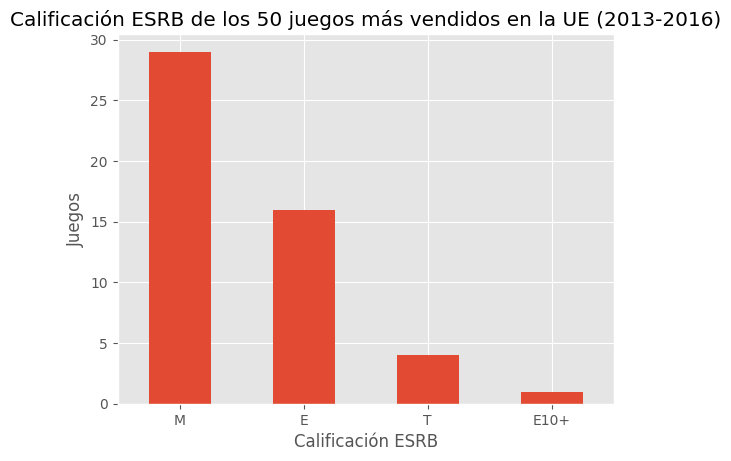

In [39]:
eu_rank = games.sort_values('eu_sales', ascending=False)
eu_rank = eu_rank[eu_rank['rating'] != 'Unknown']
eu_rank = eu_rank.head(50)
eu_rank.groupby('rating')['name'].count().sort_values(ascending=False).plot(kind='bar', rot=0, xlabel='Calificación ESRB', ylabel='Juegos', title='Calificación ESRB de los 50 juegos más vendidos en la UE (2013-2016)');

__El orden es el mismo que para la región de norteamérica__, siendo los juegos para mayores de 17 años, los favoritos.

### Japan

Mediante diversas gráficas se obtendrá el perfil de usuario para la región de Japón, empezando con los plataformas favoritas.

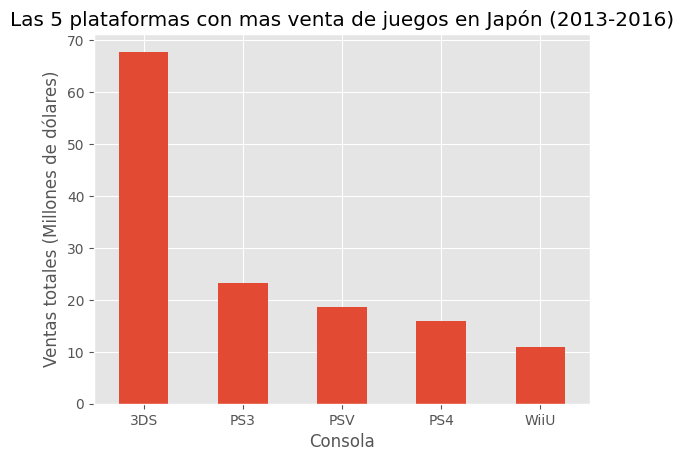

In [40]:
games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', rot=0, grid='on', title='Las 5 plataformas con mas venta de juegos en Japón (2013-2016)', xlabel='Consola', ylabel='Ventas totales (Millones de dólares)');

En cuanto a preferencia de consolas, __el top 5 de esta región son todas consolas de compañías japonesas. La consola favorita de los japoneses es la Nintendo 3DS y en tercer lugar tenemos la PlayStation Vita, ambas son consolas portátiles__, lo cual es indicio de que los "gamers" japoneses se comportan de manera diferente a los del resto de las regiones.

 Ahora se comparará la popularidad de estas plataformas en las otras regiones.

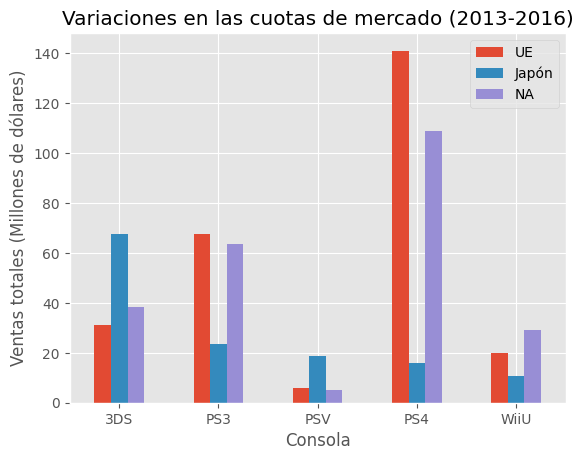

In [41]:
jp_comp = games.pivot_table(index=['platform'], values=['na_sales','eu_sales','jp_sales'], aggfunc=['sum'])
jp_comp = jp_comp.loc[['3DS','PS3','PSV','PS4','WiiU']]
jp_comp.plot(kind='bar', grid='on', rot=0, xlabel='Consola', ylabel='Ventas totales (Millones de dólares)', title='Variaciones en las cuotas de mercado (2013-2016)')
plt.legend(['UE','Japón','NA']);

Japón es donde más se venden juegos de 3DS y de PSV, esto confirma que __las consolas portátiles son muy populares en el público nipón__.

Ahora se visualizarán los géneros más populares de la región.

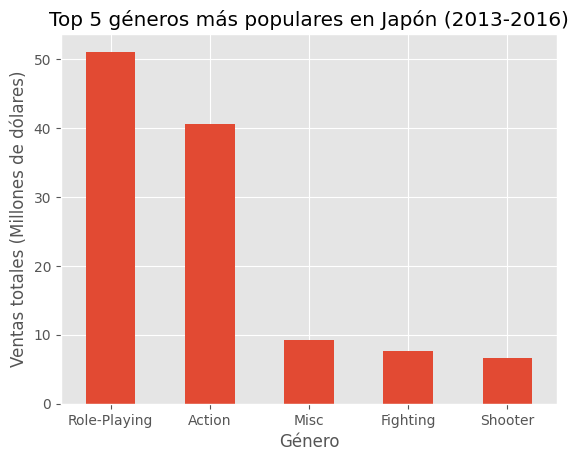

In [42]:
games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', rot=0, xlabel='Género', ylabel='Ventas totales (Millones de dólares)', title='Top 5 géneros más populares en Japón (2013-2016)', grid='on');

La categoría `Role-Playing` es la favorita del público japonés, mientras que los `Shooter` populares de otras regiones se ven desplazados al 5 lugar.

Finalmente se analizarán las preferencias en cuanto a calificación ESRB.

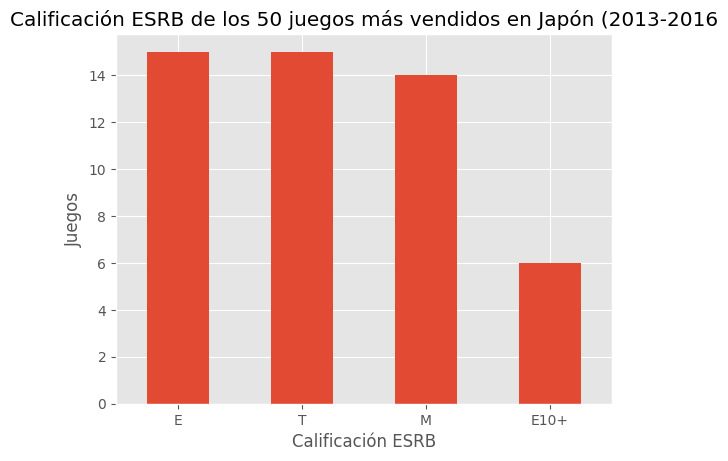

In [43]:
jp_rank = games.sort_values('jp_sales', ascending=False)
jp_rank = jp_rank[jp_rank['rating'] != 'Unknown']
jp_rank = jp_rank.head(50)
jp_rank.groupby('rating')['name'].count().sort_values(ascending=False).plot(kind='bar', rot=0, xlabel='Calificación ESRB', ylabel='Juegos', title='Calificación ESRB de los 50 juegos más vendidos en Japón (2013-2016');

En japón, los juegos para todas las edades son más populares que en las otras regiones, lo que indica que hay _gamers_ de todas las edades con gustos variados.

## Pruebas de hipótesis

A continuación se realizarán dos comprobaciones de hipótesis relacionadas con las calificaciones de los usuarios, que serán muy importantes para el desarrollo del proyecto. Se buscará usar la prueba t, pero si los supuestos (varianza y distribución normal) no se cumplen, se usará la prueba no paramétrica de Mann-Whitney.

In [44]:
alpha = .05

Se ha configurado el valor de alpha como 0.05, lo cual funcionará como un umbral para el valor p y determinar si la hipótesis nula se acepta o se rechaza.

#### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

Se probará la siguiente hipótesis: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas. La hipótesis nula es que, efectivamente, son iguales estadísticamente las calificaciones promedio  para estas dos plataformas, si se rechaza, quiere decir que hay una variación estadísticamente considerable entre las calificaciones de los usuarios para estas dos plataformas. Se usará una prueba estadística para comparar las medias de dos muestras de datos.

Comenzamos dividiendo los datos para extraer lo que necesitamos.

In [45]:
hipo_xone = users_score[users_score['platform'] == 'XOne']['user_score']
print('Xbox One')
print(hipo_xone.describe())
print()
hipo_pc = users_score[users_score['platform'] == 'PC']['user_score']
print('PC')
print(hipo_pc.describe())

Xbox One
count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

PC
count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64


Procedemos a realizar una prueba de homogeneidad de las varianzas entre los conjuntos a estudiar.

In [46]:
stat, p_value = st.levene(hipo_xone, hipo_pc)
print("Estadístico de Levene:", stat)
print("p-value:", p_value)

# Interpreta el p-value
if p_value < 0.05:
    print("Las varianzas no son homogéneas (rechazar hipótesis nula)")
else:
    print("Las varianzas son homogéneas (no se rechaza hipótesis nula)")

Estadístico de Levene: 8.44812129543499
p-value: 0.003897553110130418
Las varianzas no son homogéneas (rechazar hipótesis nula)


Las varianzas no son homogéneas, por lo que se usará la prueba de Mann-Whitney.

In [47]:
results = st.mannwhitneyu(hipo_xone, hipo_pc)
print('valor p:', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.5011006734622374
No podemos rechazar la hipótesis nula


Debido a los resultados obtenidos, no podemos rechazar la hipótesis nula, lo que significa que __la afirmación de que las calificaciones de los usuarios son iguales es estadísticamente verdadera__.

#### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

Se probará la siguiente hipótesis: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. La hipótesis nula es que no hay una diferencia estadística significativa en las calificaciones promedio de ambos géneros, si se rechaza, quiere decir que, efectivamente, hay una variación estadísticamente considerable entre las calificaciones de los usuarios para estos dos géneros. Se usará una prueba estadística para comparar las medias de dos muestras de datos.

Comenzamos dividiendo los datos para extraer lo que necesitamos.

In [48]:
hipo_action = users_score[users_score['genre'] == 'Action']['user_score']
print('Acción')
print(hipo_action.describe())
print()
print('Deportes')
hipo_sports = users_score[users_score['genre'] == 'Sports']['user_score']
print(hipo_sports.describe())

Acción
count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

Deportes
count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64


Procedemos a realizar una prueba de homogeneidad de las varianzas entre los conjuntos a estudiar.

In [49]:
stat, p_value = st.levene(hipo_action, hipo_sports)
print("Estadístico de Levene:", stat)
print("p-value:", p_value)

# Interpreta el p-value
if p_value < alpha:
    print("Las varianzas no son homogéneas (rechazar hipótesis nula)")
else:
    print("Las varianzas son homogéneas (no se rechaza hipótesis nula)")

Estadístico de Levene: 26.20600718947607
p-value: 4.2566688218274047e-07
Las varianzas no son homogéneas (rechazar hipótesis nula)


Las varianzas no son homogéneas, por lo que se usará la prueba de Mann-Whitney.

In [50]:
results = st.mannwhitneyu(hipo_action, hipo_sports)
print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 1.5189170584819927e-23
Rechazamos la hipótesis nula


Se rechaza la hipotesis nula, lo que significa que efectivamente __las calificaciones promedio para estos dos géneros son estadísticamente diferentes, siendo las de acción, mayores que las de deportes__.

## Conclusión general

Después de todo el análisis realizado y tomando en consideración que el objetivo del análisis es planificar una campañas publicitarias para 2017, se pueden recoger las siguientes conclusiones:
- __Las categorías de "Action" y "Shooter" son las favoritas en Norteamérica y en la unión europea, y la mayoría de juegos vendidos son para mayores de 18 años, gran parte de los "best sellers" como G.T.A. y la saga Call of Duty entra en esta categoría y además son juegos que suelen hacer referencia tanto a la cultura estadounidense como a la europea__ (con temáticas como guerras mundiales, ciudades estadounidenses, etc.)
- __La PS4 es la reina indiscutida en la EU y en NA, sin embargo, norteamérica es la región donde las Xbox tienen mayor presencia__, probablemente debido a que es un producto estadounidense.
- __El público japonés prefiere consolas portátiles y de fabricantes japoneses__. Su género favorito es el "Role-Playing".
- __Probablemente (en la UE y en NA) la PlayStation y la Xbox One serán las favoritas del público hasta que sean reemplazadas por sus sucesoras en 2019/2020 aproximadamente__.
- Debido al tiempo que lleva en el mercado la Nintendo 3DS y tomando en cuenta la diferencia entre en lanzamiento de la DS y la 3DS (6 años) __es posible que en 2017 aproximadamente, Nintendo lance una consola portátil que entrará fuerte en el mercado, sobretodo en Japón__.
- En cuanto a las calificaciones para juegos de PS4, las que vienen de usuarios no generan impacto en las ventas, sin embargo __las que vienen de la crítica pueden tener un impacto, en otras palabras, una calificación alta de la crítica no garantiza un rotundo éxito del juego, pero, una calificación baja si garantiza que el juego no será un "best seller"__.
- Las ventas promedio de los juegos son bajas, la mediana es de 110.000 dolares de ganancia por juego, __el porcentaje de juegos lanzados que superan los 5 millones de dólares en ventas de un 1%. Un "best seller" es una excepción a la regla, y fenómenos como "Minecraft" que vienen sin una reconocida saga por detrás, lo son aún más__.
- Las calificaciones de usuario para los juegos de accion son estadísticamente mayores que las de los juegos de deportes.
- Las calificaciones de usuario para los juegos de PC y de Xbox One son estadísticamente iguales, probablemente debido a que juegan géneros similares, se puede seguir profundizando en esto.